In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
np.random.seed(75)

## Proceso AR(1)

In [2]:
def simular_ar1(n, sigma, phi):
    """La funcion simular_ar1 simula datos de un proceso autoregresivo de grado 1 
    con error que distribuye normal con media cero y varianza sigma^2

    Args:
        n : numero de observaciones a generar
        sigma : varianza del error
        phi : parametro

    Returns:
        retorna un array con los valores del proceso
    """
    error = np.random.normal(0,sigma, n)
    x = np.zeros(n)
    x[0] = 2
    for t in range(1,n,1):
        x[t] = phi*x[t-1] + error[t]
    return x

Text(0.5, 1.0, 'Proceso AR(1) con n =100')

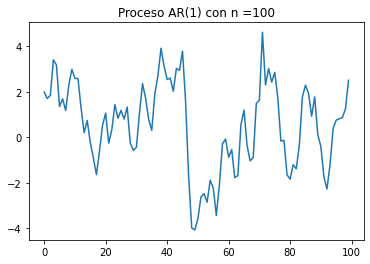

In [3]:
sigma = 1
phi = 0.8
x_100 = simular_ar1(100, sigma, phi)
x_1000 = simular_ar1(1000, sigma, phi)
plt.plot(x_100)
plt.title('Proceso AR(1) con n =100')

Text(0.5, 1.0, 'Proceso AR(1) con n =1000')

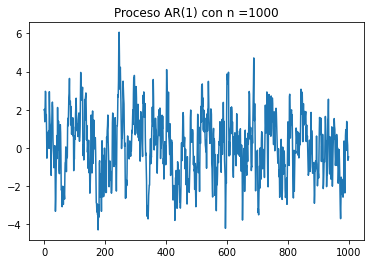

In [4]:
plt.plot(x_1000)
plt.title('Proceso AR(1) con n =1000')

### Autocorrelaciones

In [5]:
# Valores muestrales
acorr_100 = sm.tsa.acf(x_100, nlags = 5)
acorr_1000 = sm.tsa.acf(x_1000, nlags = 5)
# Valores teoricos
rhos = [phi**i for i in range(6)]
resultado = pd.DataFrame({'Muestrales n= 100': acorr_100,'Muestrales n= 1000': acorr_1000, 'Teoricas': rhos})
resultado.index = ['rho_0','rho_1', 'rho_2','rho_3','rho_4','rho_5']
resultado

,Muestrales n= 100,Muestrales n= 1000,Teoricas
rho_0,1.000000,1.000000,1.00000
rho_1,0.819118,0.801378,0.80000
rho_2,0.601266,0.632285,0.64000
rho_3,0.396277,0.518387,0.51200
rho_4,0.274003,0.419206,0.40960
rho_5,0.182015,0.355415,0.32768


## Proceso MA(1)

In [6]:
def simular_ma1(n, sigma, theta):
    """La funcion simular_ma1 simula datos de un proceso Moving Average de grado 1 
    con error que distribuye normal con media cero y varianza sigma^2

    Args:
        n : numero de observaciones a generar
        sigma : varianza del error
        theta : parametro

    Returns:
        retorna un array con los valores del proceso
    """
    error = np.random.normal(0,sigma, n)
    x = np.zeros(n)
    # El proceso empieza con x_0 = 2
    x[0] = 2
    for t in range(1,n,1):
        x[t] = error[t]- theta*error[t-1] 
    return x

Text(0.5, 1.0, 'Proceso MA(1) con n =100')

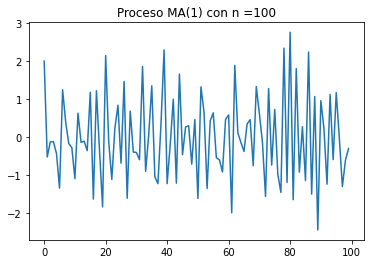

In [7]:
sigma = 1
theta = 0.6
x_100 = simular_ma1(100, sigma, theta)
x_1000 = simular_ma1(1000, sigma, theta)
plt.plot(x_100)
plt.title('Proceso MA(1) con n =100')

Text(0.5, 1.0, 'Proceso MA(1) con n =1000')

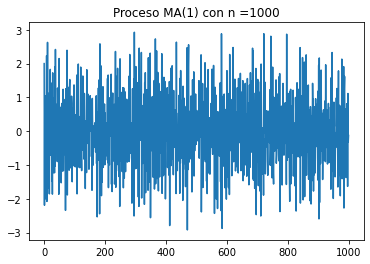

In [8]:
plt.plot(x_1000)
plt.title('Proceso MA(1) con n =1000')

### Autocorrelaciones
Las autocorrelaciones teóricas para un proceso MA(1) son:
\begin{align*}
\rho_0 &= 1\\
\rho_1 &= \frac{-\theta}{1+\theta^2}\\
\rho_j &= 0  & \forall j > 1
\end{align*}

In [9]:
# Valores muestrales
acorr_100 = sm.tsa.acf(x_100, nlags = 5)
acorr_1000 = sm.tsa.acf(x_1000, nlags = 5)
# Valores teoricos
rhos = [1,-theta/(1+theta**2),0,0,0,0]
resultado = pd.DataFrame({'Muestrales n= 100': acorr_100,'Muestrales n= 1000': acorr_1000, 'Teoricas': rhos})
resultado.index = ['rho_0','rho_1', 'rho_2','rho_3','rho_4','rho_5']
resultado

,Muestrales n= 100,Muestrales n= 1000,Teoricas
rho_0,1.000000,1.000000,1.000000
rho_1,-0.545778,-0.415859,-0.441176
rho_2,0.120015,0.010085,0.000000
rho_3,-0.049764,-0.065623,0.000000
rho_4,0.044418,0.090071,0.000000
rho_5,-0.059915,-0.039505,0.000000
